## Sentiment Analysis of music lyrics over the decades

**RQ1: How has the sentiment of artists in song lyrics changed over the decades?**

**RQ2: How have major historical events had an influence on the sentiment of song lyrics?**











In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv(r'tcc_ceds_music.csv')


In [4]:
print('Shape', df.shape)


Shape (28372, 31)


### Some stats
*   Dataframe info
*   Frequency of Genres
*   Frequency of Topics
*   Distribution of music over the decades



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

## Standard visualizations of the data

7042


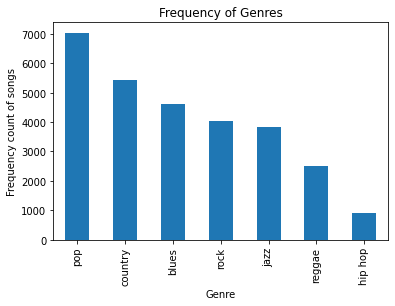

In [6]:
print(df['genre'].value_counts()['pop'])


df['genre'].value_counts().plot(kind='bar',title='Frequency of Genres', xlabel="Genre",ylabel="Frequency count of songs")

filename = 'bar-chart-dist-genres'
# plt.savefig(filename+'.pdf',bbox_inches='tight')
plt.show()


1950-1960      0
1960-1970      0
1970-1980      0
1980-1990     11
1990-2000     32
2000-2010    221
2010-2019    640
Name: year_interval, dtype: int64


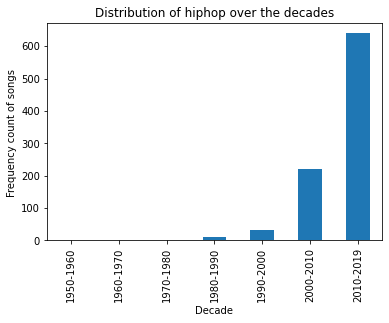

In [7]:
df['year_interval'] = pd.cut(df['release_date'], bins=[1950, 1960, 1970, 1980,1990,2000,2010,2019], 
                             include_lowest=True, 
                             labels=['1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2019'])
mask = df[df['genre']=='hip hop']
ax = mask['year_interval'].value_counts(sort=False).plot.bar(figsize=(6,4),title='Distribution of hiphop over the decades', xlabel="Decade",ylabel="Frequency count of songs ")
print( mask['year_interval'].value_counts(sort=False))

filename = 'bar-chart-dist-hiphop'

# plt.savefig(filename+'.pdf',bbox_inches='tight')

plt.show()

1950-1960    125
1960-1970    339
1970-1980    576
1980-1990    837
1990-2000    728
2000-2010    648
2010-2019    781
Name: year_interval, dtype: int64


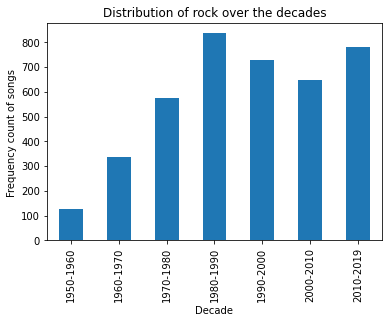

In [8]:
df['year_interval'] = pd.cut(df['release_date'], bins=[1950, 1960, 1970, 1980,1990,2000,2010,2019], 
                             include_lowest=True, 
                             labels=['1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2019'])
mask = df[df['genre']=='rock']
ax = mask['year_interval'].value_counts(sort=False).plot.bar(figsize=(6,4),title='Distribution of rock over the decades', xlabel="Decade",ylabel="Frequency count of songs ")
print( mask['year_interval'].value_counts(sort=False))

filename = 'bar-chart-dist-rock'

# plt.savefig(filename+'.pdf',bbox_inches='tight')

plt.show()

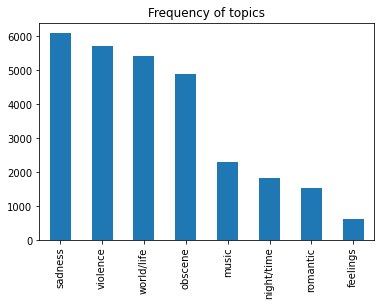

In [9]:
df['topic'].value_counts().plot(kind='bar',title="Frequency of topics")
plt.show()

1950-1960    1742
1960-1970    3487
1970-1980    4108
1980-1990    4578
1990-2000    4428
2000-2010    4816
2010-2019    5213
Name: year_interval, dtype: int64


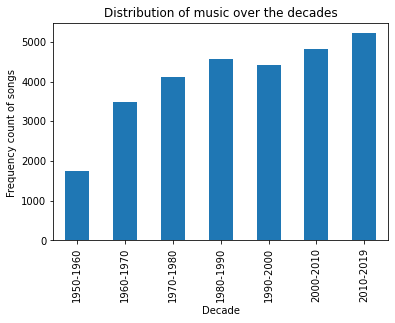

In [10]:
df['year_interval'] = pd.cut(df['release_date'], bins=[1950, 1960, 1970, 1980,1990,2000,2010,2019], 
                             include_lowest=True, 
                             labels=['1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2019'])
ax = df['year_interval'].value_counts(sort=False).plot.bar(figsize=(6,4),title='Distribution of music over the decades', xlabel="Decade",ylabel="Frequency count of songs ")
print( df['year_interval'].value_counts(sort=False))

filename = 'bar-chart-dist-years'

#plt.savefig(filename+'.pdf',bbox_inches='tight')

plt.show()



### Drop unnecessary columns

In [12]:
#drop unnecessary
df = df.drop(['dating','violence','world/life','night/time','shake the audience',
              'family/gospel','romantic','communication','obscene', 'music',
              'movement/places','light/visual perceptions', 'family/spiritual',
              'like/girls','sadness','feelings','danceability','loudness',
              'acousticness','instrumentalness','valence','energy', "age", 'len','topic'],axis='columns')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,year_interval
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,1950-1960
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,1950-1960
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,1950-1960
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,1950-1960
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,1950-1960


## Test performance of the VADER model

### Create test set

Test set is created with create_test.py

In [14]:
df_validation = pd.read_csv(r'validation_set.csv',index_col=False)
df_validation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     70 non-null     int64 
 1   artist_name    70 non-null     object
 2   track_name     70 non-null     object
 3   lyrics         70 non-null     object
 4   year_interval  70 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [15]:
# Imports and stuff
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
sent_analyzer = SentimentIntensityAnalyzer()

In [17]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df_validation["vader_prediction"] = df_validation["lyrics"].apply(predict_sentiment)

In [18]:
labels = pd.read_csv(r'labels.csv',index_col=False)
labels.head()


,Sentiment
0,positive
1,neutral
2,positive
3,negative
4,positive


In [19]:
# test performance of VADER
accuracy = accuracy_score(labels['Sentiment'], df_validation['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(labels['Sentiment'], df_validation['vader_prediction']))

Accuracy: 0.7714285714285715

              precision    recall  f1-score   support

    negative       0.79      0.65      0.71        23
     neutral       1.00      0.40      0.57        10
    positive       0.74      0.95      0.83        37

    accuracy                           0.77        70
   macro avg       0.84      0.67      0.71        70
weighted avg       0.80      0.77      0.76        70



## Analysis of all song lyrics
VADER analysis over the whole dataset.

In [20]:
## VADER on whole dataset
start = time.time()
df["Sentiment predictions"] = df["lyrics"].apply(predict_sentiment)
end = time.time()
print("Calculation time for VADER was: {} seconds".format( end - start))
df.head()

Calculation time for VADER was: 51.508002519607544 seconds


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,year_interval,Sentiment predictions
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,1950-1960,positive
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,1950-1960,negative
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,1950-1960,positive
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,1950-1960,positive
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,1950-1960,positive


## Visualizing the distribution of sentiment over the whole data set


positive    16585
negative    11210
neutral       577
Name: Sentiment predictions, dtype: int64


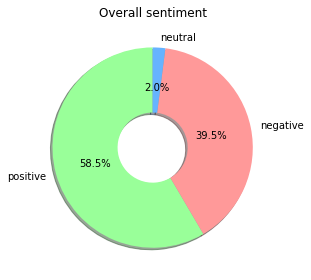

In [21]:
prediction_counts = df['Sentiment predictions'].value_counts()
print(prediction_counts)

# pie chart
y = np.array([16585,11210,577])
labels_s = ['positive','negative','neutral']
colors =  ['#99ff99','#ff9999','#66b3ff']
myexplode = [0., 0., 0.]
plt.pie(y, labels = labels_s, explode = myexplode, shadow = True, colors=colors,startangle=90,
           autopct='%1.1f%%',wedgeprops=dict(width=.65))
plt.title("Overall sentiment")


filename = 'pie-chart-sentiments'
plt.tight_layout()
plt.savefig(filename+'.pdf')
plt.show()

## Visualzing the sentiment distributions for the first and last decade

In [22]:

year_intervals = ['1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2019']

posi = []
nega = []
neut = []
for i in year_intervals:
  mask = df.loc[df['year_interval']==i]
  neg,neu,pos = (mask.groupby('Sentiment predictions').size()/mask['Sentiment predictions'].count())*100
  posi.append(pos)
  nega.append(neg)
  neut.append(neu)




[71.1825487944891, 65.01290507599656, 62.779941577409936, 57.88553953691569, 57.24932249322493, 54.256644518272424, 51.812775752925376]
[26.80826636050517, 32.463435618009754, 35.00486854917234, 40.039318479685456, 40.966576332429995, 43.85382059800664, 46.3073086514483]
[2.009184845005741, 2.5236593059936907, 2.2151898734177213, 2.075141983398864, 1.7841011743450768, 1.88953488372093, 1.8799155956263187]


In [23]:
years_df = pd.DataFrame(index=year_intervals)
years_df['postive_percentage'] = posi
years_df['neutral_percentage'] = neut
years_df['negative_percentage'] = nega
years_df.head()

,postive_percentage,neutral_percentage,negative_percentage
1950-1960,71.182549,2.009185,26.808266
1960-1970,65.012905,2.523659,32.463436
1970-1980,62.779942,2.215190,35.004869
1980-1990,57.885540,2.075142,40.039318
1990-2000,57.249322,1.784101,40.966576


positive    1240
negative     467
neutral       35
Name: Sentiment predictions, dtype: int64


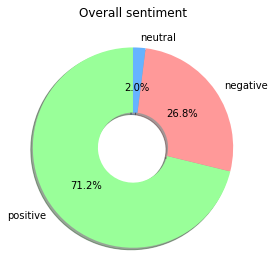

In [24]:

mask = df.loc[df['year_interval']=='1950-1960']
prediction_counts_mask = mask['Sentiment predictions'].value_counts()
print(prediction_counts_mask)
# pie chart
y = np.array([1240,467,35])
labels_s = ['positive','negative','neutral']
colors =  ['#99ff99','#ff9999','#66b3ff']
myexplode = [0., 0., 0.]
plt.pie(y, labels = labels_s, explode = myexplode, shadow = True, colors=colors,startangle=90,
           autopct='%1.1f%%',wedgeprops=dict(width=.65))
plt.title("Overall sentiment")


filename = 'pie-chart-sentiments-first-decade'
plt.tight_layout()
plt.savefig(filename+'.pdf')
plt.show()

positive    2701
negative    2414
neutral       98
Name: Sentiment predictions, dtype: int64


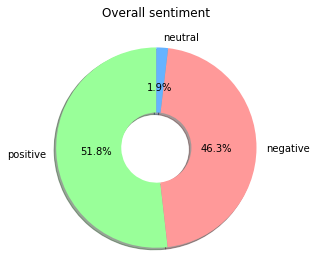

In [25]:
mask2 = df.loc[df['year_interval']=='2010-2019']
prediction_counts_mask2 = mask2['Sentiment predictions'].value_counts()
print(prediction_counts_mask2)
# pie chart
y = np.array([2701,2414,98])
labels_s = ['positive','negative','neutral']
colors =  ['#99ff99','#ff9999','#66b3ff']
myexplode = [0., 0., 0.]
plt.pie(y, labels = labels_s, explode = myexplode, shadow = True, colors=colors,startangle=90,
           autopct='%1.1f%%',wedgeprops=dict(width=.65))
plt.title("Overall sentiment")


filename = 'pie-chart-sentiments-last-decade'
plt.tight_layout()
plt.savefig(filename+'.pdf')
plt.show()

## Visualizing the overall trend of sentiment per 10 year.

In [26]:
#!pip install -U kaleido

In [40]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

fig = go.Figure([go.Scatter(x=years_df.index, y=years_df['postive_percentage'],name="Positive")])
fig.add_trace( go.Scatter(x=years_df.index, y=years_df['negative_percentage'],name="Negative"))
fig.add_trace( go.Scatter(x=years_df.index, y=years_df['neutral_percentage'],name="Neutral"))

fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    title="Sentiment percentage over time",
    xaxis_title="Decade",
    yaxis_title="Relative percentage of total sentiment",
    legend_title="Sentiments",
    title_x=0.45,
    font=dict(
        family="Arial",
        size=14,
    ),
    width=800,
    height=450
)
pio.write_image(fig, 'fig2.pdf')
#fig.write_image("plotly.svg")
fig.show()

## Sentiment portion visualization for every genre

In [28]:
genres = df['genre'].unique()

posi_g = []
nega_g = []
neut_g = []
for i in genres:
  mask = df.loc[df['genre']==i]

  neg,neu,pos = (mask.groupby('Sentiment predictions').size()/mask['Sentiment predictions'].count())*100
  posi_g.append(pos)
  nega_g.append(neg)
  neut_g.append(neu)


print(posi_g)
print(nega_g)
print(neut_g)

[60.76398750355013, 64.51790633608815, 57.34144222415291, 62.158647594278285, 55.16413130504404, 50.371839365394145, 39.048672566371685]
[37.80176086339108, 33.81083562901745, 39.856646394439615, 34.79843953185956, 43.15452361889512, 47.52107089737233, 59.623893805309734]
[1.43425163305879, 1.6712580348943986, 2.801911381407472, 3.042912873862159, 1.6813450760608486, 2.107089737233515, 1.3274336283185841]


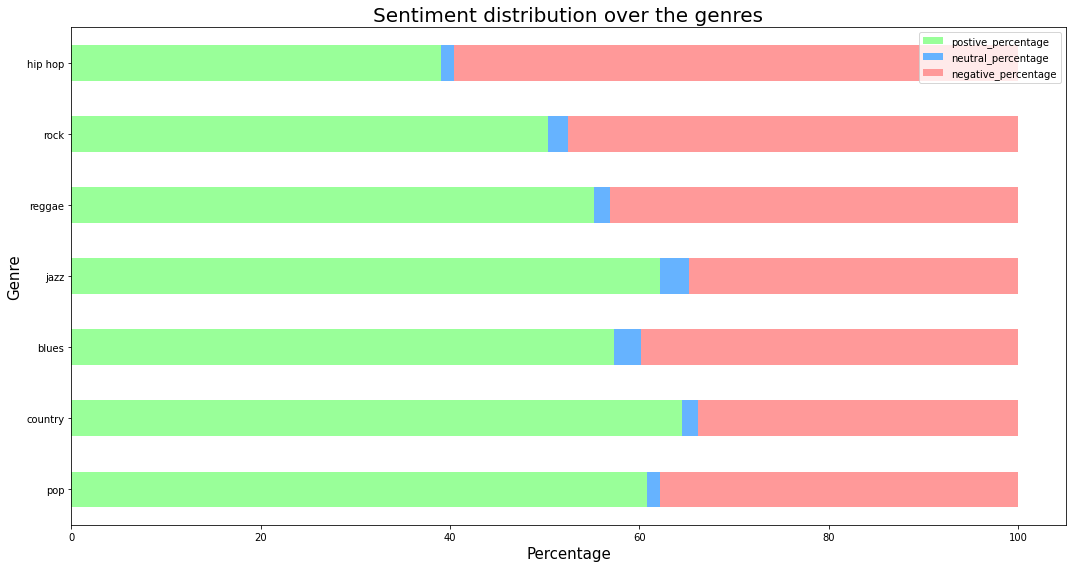

In [29]:
genres_df = pd.DataFrame(index=df['genre'].unique())
genres_df['postive_percentage'] = posi_g
genres_df['neutral_percentage'] = neut_g
genres_df['negative_percentage'] = nega_g
genres_df.head()
colors_b =  ['#99ff99','#66b3ff','#ff9999']
genres_df.plot(kind='barh',figsize=(15,8),stacked=True,color=colors_b)
plt.title("Sentiment distribution over the genres", fontsize = 20)
plt.xlabel("Percentage",fontsize = 15)
plt.ylabel("Genre",fontsize = 15)
plt.tight_layout()
plt.savefig("bar_dist_sen_genre.pdf")
plt.show()

## Sentiment changes per year and superimposing the world events on the sentiment trends

In [30]:
years = df['release_date'].unique()
posi_y = []
nega_y = []
for i in years:
  mask = df.loc[df['release_date']==i]
  try:
    neg,_,pos = (mask.groupby('Sentiment predictions').size()/mask['Sentiment predictions'].count())*100
  except:
    neg,pos = (mask.groupby('Sentiment predictions').size()/mask['Sentiment predictions'].count())*100

    

  posi_y.append(pos)
  nega_y.append(neg)


[80.3921568627451, 68.96551724137932, 71.66666666666667, 75.0, 72.47706422018348, 75.47169811320755, 76.0, 67.51054852320675, 73.17073170731707, 71.47435897435898, 64.23357664233576, 66.05166051660517, 68.28478964401295, 66.39566395663957, 62.92428198433421, 64.32584269662921, 68.80466472303208, 62.944162436548226, 67.0103092783505, 61.49068322981367, 62.5, 61.43250688705234, 66.189111747851, 62.755102040816325, 71.8232044198895, 63.14496314496314, 62.64044943820225, 64.7196261682243, 60.130718954248366, 57.14285714285714, 60.90373280943025, 58.84615384615385, 54.67775467775468, 54.372623574144484, 54.315789473684205, 59.95085995085995, 63.146551724137936, 58.85057471264368, 59.95260663507109, 60.550458715596335, 55.09708737864077, 58.25049701789264, 57.874015748031496, 58.76288659793815, 56.55913978494623, 52.72727272727272, 58.009708737864074, 55.831265508684865, 55.33980582524271, 59.32203389830508, 58.7467362924282, 54.077253218884124, 53.747323340471084, 56.17021276595745, 52.1920

In [32]:
release_df = pd.DataFrame(index=df['release_date'].unique())
release_df['postive_percentage'] = posi_y
release_df['negative_percentage'] = nega_y
release_df.head()

,postive_percentage,negative_percentage
1950,80.392157,17.647059
1951,68.965517,31.034483
1952,71.666667,28.333333
1953,75.000000,25.000000
1954,72.477064,25.688073


In [33]:
import plotly.io as pio

fig = go.Figure([go.Scatter(x=release_df.index, y=release_df['postive_percentage'],name="Positive")])
fig.add_trace( go.Scatter(x=release_df.index, y=release_df['negative_percentage'],name="Negative"))

fig.add_vline(x=1969,line_dash="dash",annotation_text="Man on the moon", annotation_position="top left")
fig.add_vline(x=1975,line_dash="dash",annotation_text="End of Vietnam war")
fig.add_vline(x=1989,line_dash="dash",annotation_text="Fall Berlin wall")
fig.add_vline(x=2001,line_dash="dash",annotation_text="9/11")
fig.add_vline(x=2015,line_dash="dash",annotation_text="Migrant crisis", annotation_position="top left")

fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    title="Sentiment percentage over time",
    xaxis_title="Decade",
    yaxis_title="Relative percentage of total sentiment",
    legend_title="Sentiments",
    title_x=0.45,
    font=dict(
        family="Arial",
        size=14,
    ),
    width=1500,
    height=500
)
pio.write_image(fig, 'fig1.pdf')
fig.show()

## Testing Significance between the first and last decade for negative sentiment.
Difference in sentiment between the first and last decade.

In [35]:
foo_neg = release_df['negative_percentage'].iloc[:10]


foo_neg_end = release_df['negative_percentage'].iloc[60:]
print(foo_neg.to_numpy())
print(foo_neg_end.to_numpy())

[17.64705882 31.03448276 28.33333333 25.         25.68807339 21.69811321
 22.         31.64556962 24.04181185 26.28205128]
[45.45454545 44.25612053 43.87755102 42.67857143 43.76163873 48.46029173
 48.03001876 46.06060606 51.91424196 46.62921348]


In [37]:
from scipy import stats
from scipy.stats import ttest_ind
_, p1 = stats.wilcoxon(foo_neg.to_numpy(),foo_neg_end.to_numpy(),alternative="less")
print(p1)


0.0009765625
0.0009765625
